# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

from config import api_key

# Import API key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


f1a313cf23f6bc32f92edeffe96219ac


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



# Print the city count to confirm sufficient count
len(cities)



596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_url
city="Arlington, Virginia"

response = requests.get(query_url + city).json()
#response["main"]["temp"]
query_url
response

{'coord': {'lon': -97.11, 'lat': 32.74},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 17.15,
  'pressure': 1009,
  'humidity': 34,
  'temp_min': 15,
  'temp_max': 19},
 'visibility': 16093,
 'wind': {'speed': 4.6, 'deg': 290},
 'rain': {'1h': 1.27},
 'clouds': {'all': 5},
 'dt': 1575158417,
 'sys': {'type': 1,
  'id': 3226,
  'country': 'US',
  'sunrise': 1575119519,
  'sunset': 1575156152},
 'timezone': -21600,
 'id': 4671240,
 'name': 'Arlington',
 'cod': 200}

In [4]:
# set up lists to hold reponse info

citiesTemperature= pd.DataFrame(cities, columns=["Cities"])
citiesTemperature["Latitude"]=""
citiesTemperature["Longtitude"]=""
citiesTemperature["Temperature"]=""
citiesTemperature["Humidity"]=""
citiesTemperature["Wind speed"]=""
citiesTemperature["Cloudiness"]=""




citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,port alfred,,,,,,
1,nenjiang,,,,,,
2,nizhneyansk,,,,,,
3,kapaa,,,,,,
4,rikitea,,,,,,


In [5]:
# Loop through the list of cities and perform a request for data on each

# call requests:
#response["coord"]["lon"]
#response["coord"]["lat"]
#response["name"]
#response["main"]["humidity"]
#response["wind"]["speed"]
#response["clouds"]["all"]
#response["dt"]

DateRetrieved= pd.to_datetime('today').strftime("%m/%d/%Y")

for index, row in citiesTemperature.iterrows():
        city = row['Cities']
    
        try:
            response = requests.get(query_url + city).json()
            tem=response['main']["temp_max"]
            weather= response["weather"][0]["description"]
            
            #temp.append(response['main']['temp'])
            citiesTemperature.loc[index, "Cities"] = response["name"]
            citiesTemperature.loc[index, "Latitude"] = response["coord"]["lat"]
            citiesTemperature.loc[index, "Longtitude"] = response["coord"]["lon"]
            citiesTemperature.loc[index, "Temperature"] = response['main']["temp_max"]
            citiesTemperature.loc[index, "Humidity"] = response["main"]["humidity"]
            citiesTemperature.loc[index, "Wind speed"] = response["wind"]["speed"]
            citiesTemperature.loc[index, "Cloudiness"] = response["clouds"]["all"]
            print(f"The max temperature of {city} today  is: {tem} and the weather is {weather}")

        except:
            #citiesTemperature.loc[index, "Cities"] = "No Values"
            #print(f"Missing Value")
            continue
            
        



The max temperature of port alfred today  is: 17.22 and the weather is broken clouds
The max temperature of nenjiang today  is: -18.29 and the weather is few clouds
The max temperature of kapaa today  is: 29 and the weather is scattered clouds
The max temperature of rikitea today  is: 25.69 and the weather is broken clouds
The max temperature of hyderabad today  is: 21.11 and the weather is mist
The max temperature of huatulco today  is: 30 and the weather is few clouds
The max temperature of puerto ayora today  is: 24 and the weather is few clouds
The max temperature of mataura today  is: 15 and the weather is overcast clouds
The max temperature of punta arenas today  is: 11 and the weather is scattered clouds
The max temperature of dubbo today  is: 23 and the weather is clear sky
The max temperature of east london today  is: 20.38 and the weather is overcast clouds
The max temperature of saint-philippe today  is: -5.56 and the weather is overcast clouds
The max temperature of huarmey

The max temperature of dingle today  is: 24.4 and the weather is overcast clouds
The max temperature of dikson today  is: -26.56 and the weather is clear sky
The max temperature of naze today  is: 24.29 and the weather is scattered clouds
The max temperature of victoria today  is: 27 and the weather is broken clouds
The max temperature of coquimbo today  is: 16 and the weather is few clouds
The max temperature of dudinka today  is: -24 and the weather is few clouds
The max temperature of hilo today  is: 26 and the weather is heavy intensity rain
The max temperature of kodiak today  is: 10 and the weather is clear sky
The max temperature of esperance today  is: 15 and the weather is overcast clouds
The max temperature of guerrero negro today  is: 16.57 and the weather is clear sky
The max temperature of ribeira grande today  is: 17.51 and the weather is broken clouds
The max temperature of saskylakh today  is: -36.23 and the weather is clear sky
The max temperature of dangriga today  is

The max temperature of edd today  is: 26.61 and the weather is overcast clouds
The max temperature of skawina today  is: 0 and the weather is broken clouds
The max temperature of tsuruga today  is: 6.11 and the weather is few clouds
The max temperature of shimoda today  is: 12 and the weather is light intensity shower rain
The max temperature of hualmay today  is: 19.38 and the weather is clear sky
The max temperature of gat today  is: 22 and the weather is overcast clouds
The max temperature of avarua today  is: 26 and the weather is overcast clouds
The max temperature of touros today  is: 26 and the weather is scattered clouds
The max temperature of bonavista today  is: 2.22 and the weather is light rain
The max temperature of kolokani today  is: 23.08 and the weather is clear sky
The max temperature of kajaani today  is: -9 and the weather is broken clouds
The max temperature of manta today  is: 1.49 and the weather is scattered clouds
The max temperature of luderitz today  is: 18 a

The max temperature of tuatapere today  is: 15 and the weather is moderate rain
The max temperature of belmonte today  is: 9.44 and the weather is light rain
The max temperature of xingyi today  is: 11.53 and the weather is scattered clouds
The max temperature of sechura today  is: 20.67 and the weather is clear sky
The max temperature of rocha today  is: 13.22 and the weather is broken clouds
The max temperature of berdigestyakh today  is: -22.48 and the weather is broken clouds
The max temperature of nanortalik today  is: 5.81 and the weather is light rain
The max temperature of olga today  is: 16 and the weather is light rain
The max temperature of moron today  is: 25.12 and the weather is few clouds
The max temperature of kazachinskoye today  is: -9.2 and the weather is light snow
The max temperature of nouadhibou today  is: 16 and the weather is fog
The max temperature of noumea today  is: 30 and the weather is few clouds
The max temperature of dutse today  is: 23.37 and the weath

The max temperature of muroto today  is: 9 and the weather is scattered clouds
The max temperature of ballesteros today  is: 24.84 and the weather is light rain
The max temperature of gornopravdinsk today  is: -10.96 and the weather is broken clouds
The max temperature of nemuro today  is: -4 and the weather is broken clouds
The max temperature of marsh harbour today  is: 22.92 and the weather is broken clouds
The max temperature of homer today  is: 4 and the weather is few clouds
The max temperature of parkes today  is: 24.44 and the weather is clear sky
The max temperature of tateyama today  is: 8 and the weather is scattered clouds
The max temperature of bam today  is: 10.77 and the weather is clear sky
The max temperature of benjamin constant today  is: 28 and the weather is few clouds
The max temperature of elizabeth city today  is: 8.33 and the weather is overcast clouds
The max temperature of fortuna today  is: 10.56 and the weather is light rain
The max temperature of samana to

The max temperature of quijingue today  is: 24.87 and the weather is overcast clouds
The max temperature of walvis bay today  is: 16.67 and the weather is clear sky
The max temperature of tucuman today  is: 10.38 and the weather is clear sky
The max temperature of coahuayana today  is: 26.11 and the weather is broken clouds
The max temperature of amahai today  is: 27.51 and the weather is light rain
The max temperature of qostanay today  is: -15 and the weather is broken clouds
The max temperature of namtsy today  is: -34 and the weather is mist
The max temperature of saint-augustin today  is: -5.56 and the weather is few clouds
The max temperature of lasa today  is: 16 and the weather is scattered clouds
The max temperature of nueva rosita today  is: 22.2 and the weather is clear sky
The max temperature of haines junction today  is: -6.35 and the weather is broken clouds
The max temperature of vanavara today  is: -29.74 and the weather is scattered clouds
The max temperature of pokhar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#reformatting and cleaning data

citiesTemperature["Temperature"]=pd.to_numeric(citiesTemperature["Temperature"], downcast='float')
citiesTemperature["Longtitude"]=pd.to_numeric(citiesTemperature["Longtitude"], downcast='float')
citiesTemperature["Latitude"]=pd.to_numeric(citiesTemperature["Latitude"], downcast='float')
citiesTemperature["Humidity"]=pd.to_numeric(citiesTemperature["Humidity"], downcast='float')
citiesTemperature["Wind speed"]=pd.to_numeric(citiesTemperature["Wind speed"], downcast='float')
citiesTemperature["Cloudiness"]=pd.to_numeric(citiesTemperature["Cloudiness"], downcast='float')


citiesTemperature=citiesTemperature.dropna(how="any")

citiesTemperature.dtypes
citiesTemperature.to_csv("Weather Report.csv",index=False)
citiesTemperature.to_html("WeatherData.html",classes=["table-bordered", "table-striped", "table-hover"])
citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,Port Alfred,-33.590000,26.889999,17.219999,84.0,0.89,65.0
1,Nenjiang,49.169998,125.230003,-18.290001,94.0,0.76,12.0
3,Kapaa,22.080000,-159.320007,29.000000,61.0,8.70,40.0
4,Rikitea,-23.120001,-134.970001,25.690001,73.0,2.04,72.0
5,Hyderabad,17.360001,78.470001,21.110001,100.0,2.19,100.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

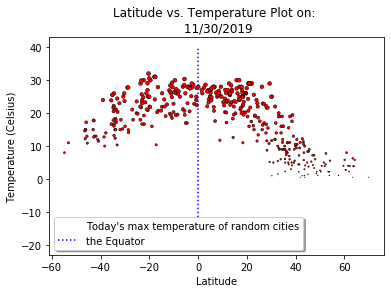

In [16]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Temperature"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.',
            linewidth=0.5,
            label="Today's max temperature of random cities",
            facecolors="red", edgecolors="black",
            s=2*y)
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Temperature Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.vlines(0,-20,40, alpha=1, color='blue', label='the Equator', linestyles='dotted')
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

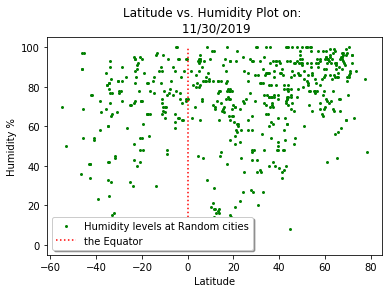

In [11]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Humidity"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='green', linewidth=0, label="Humidity levels at Random cities")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Humidity Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.vlines(0,0,100, alpha=1, color='red', label='the Equator', linestyles='dotted')
plt.legend(loc='best', framealpha =1,shadow = True ) 


# Show the Figure
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()


#### Latitude vs. Cloudiness Plot

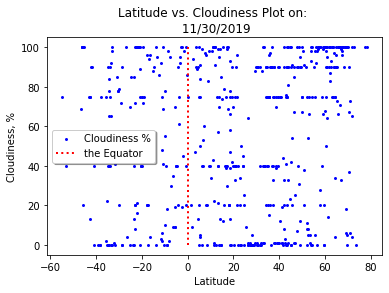

In [12]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Cloudiness"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='blue', linewidth=0,label="Cloudiness %")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Cloudiness Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.vlines(0,0,100,
           color='red',
           label='the Equator',
           linestyles='dotted',
           linewidth=2)

plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

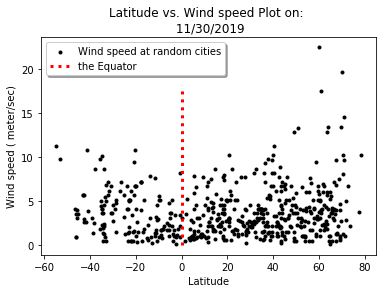

In [14]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Wind speed"]


#plotting the axises
plt.scatter(x_axis,
            y,marker ='.',
            color='black',
            linewidth=1,
            label="Wind speed at random cities",
            )
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Wind speed Plot on: \n {DateRetrieved}" )
plt.xlabel("Latitude")
plt.ylabel("Wind speed ( meter/sec)")
plt.vlines(0,0,18, alpha=1, color='red', label='the Equator', linestyles='dotted', linewidth=3)
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Wind speed Plot.png")
plt.show()

## Observations

1. There seems to be a strong visual indication of a relationship between current temperature and proximity to the equator. As cities are located closer to the equator the current temperature seems to rise. 

2. There is no visual indication of any relationship between humidity and cloudiness.

3. But there seems to be some visual correlation between current wind speed and proximity to the Equator.